#Upload the files

In [ ]:
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns

### Importing dataset of Steam Ukrainian games for each month (Jan-May)

In [ ]:
df1 = files.upload()

Saving steam_ukr_games_02.01.csv to steam_ukr_games_02.01.csv


In [ ]:
df1 = pd.read_csv('/content/steam_ukr_games_02.01.csv')

In [ ]:
df2 = files.upload()

Saving steam_ukr_games_02.02.24.csv to steam_ukr_games_02.02.24.csv


In [ ]:
df2 = pd.read_csv('/content/steam_ukr_games_02.02.24.csv')

In [ ]:
df3 = files.upload()

Saving steam_ukr_games_02.03.24.csv to steam_ukr_games_02.03.24.csv


In [ ]:
df3 = pd.read_csv('/content/steam_ukr_games_02.03.24.csv')

In [ ]:
df4 = files.upload()

Saving steam_ukr_games_02.04.24.csv to steam_ukr_games_02.04.24.csv


In [ ]:
df4 = pd.read_csv('/content/steam_ukr_games_02.04.24.csv')

In [ ]:
df5 = files.upload()

Saving steam_ukr_games_02.05.24.csv to steam_ukr_games_02.05.24.csv


In [ ]:
df5 = pd.read_csv('/content/steam_ukr_games_02.05.24.csv')

In [ ]:
df1['month'] = 'January'
df2['month'] = 'February'
df3['month'] = 'March'
df4['month'] = 'April'
df5['month'] = 'May'

In [ ]:
# concatenate all datasets in one
df = pd.concat([df1,df2],ignore_index=True)
df = pd.concat([df,df3],ignore_index=True)
df = pd.concat([df,df4],ignore_index=True)
df = pd.concat([df,df5],ignore_index=True)

#Descriptive analysis

This dataset contains information about the performance of Ukrainian games on the Steam platform. It includes:

  * appid - Steam Application ID. If it's 999999, then data for this application is hidden on developer's request.
  * name - game's name
  * developer - comma separated list of the developers of the game
  * publisher - comma separated list of the publishers of the game
  * score_rank - score rank of the game based on user reviews
  * owners - owners of this application on Steam as a range.
  * average_forever - average playtime since March 2009. In minutes.
  * average_2weeks - average playtime in the last two weeks. In minutes.
  * median_forever - median playtime since March 2009. In minutes.
  * median_2weeks - median playtime in the last two weeks. In minutes.
  * ccu - peak CCU (users connected at the same time in any given moment) yesterday.
  * price - current US price in cents.
  * tags - game's tags with votes in JSON array.
  * languages - list of supported languages.
  * genre - list of genres.

In [ ]:
df[df.appid==999999] # ensure we have all the data

,appid,name,developer,publisher,score_rank,owners,average_forever,average_2weeks,median_forever,median_2weeks,ccu,price,tags,languages,genre,month


In [ ]:
df['appid']=df['appid'].astype(str)

In [ ]:
print(f"Number of unique games: {df.name.nunique()}")
print(f"Number of developers: {df.developer.nunique()}")
print(f"Number of publisher: {df.publisher.nunique()}")

Number of unique games: 41
Number of developers: 23
Number of publisher: 23


In [ ]:
df1.head()

,appid,name,developer,publisher,score_rank,owners,average_forever,average_2weeks,median_forever,median_2weeks,ccu,price,tags,languages,genre,month
0,1137300,Sherlock Holmes Chapter One,Frogwares,Frogwares,NaN,"100,000 .. 200,000",0,0,0,0,168,899,"{'Detective': 339, 'Open World': 311, 'Story R...","English, French, Italian, German, Spanish - Sp...","Action, Adventure",January
1,1453790,The Serpent Rogue,Sengi Games,Team17,NaN,"50,000 .. 100,000",0,0,0,0,4,199,"{'Crafting': 497, 'Adventure': 486, 'Action-Ad...","English, Russian, Ukrainian, French, German, S...","Action, Adventure, Indie, RPG",January
2,2000760,Boiling Point: Road to Hell,Deep Shadows,Ziggurat,NaN,"0 .. 20,000",0,0,0,0,1,999,"{'Adventure': 147, 'Action': 133, 'Action RPG'...","English, French, Italian, German, Spanish - Spain","Action, Adventure, Racing",January
3,2061230,Chasm: The Rift,"Action Forms, General Arcade",SNEG,NaN,"0 .. 20,000",0,0,0,0,0,999,"{'FPS': 99, 'Retro': 92, 'Shooter': 87, 'Old S...","English, French, Italian, German, Spanish - Sp...",Action,January
4,939960,Far Cry New Dawn,"Ubisoft Montreal, Ubisoft Kiev, Ubisoft Shanghai",Ubisoft,NaN,"1,000,000 .. 2,000,000",0,0,0,0,682,799,"{'Open World': 316, 'FPS': 238, 'Action': 232,...","English, French, Italian, German, Spanish - Sp...","Action, Adventure",January


In [ ]:
print(df1.size)
print(df2.size)
print(df3.size)
print(df4.size)
print(df5.size)

704
704
512
720
720


In [ ]:
df1.developer.unique()

array(['Frogwares', 'Sengi Games', 'Deep Shadows',
       'Action Forms, General Arcade',
       'Ubisoft Montreal, Ubisoft Kiev, Ubisoft Shanghai', 'Creoteam',
       'Best Way', 'Stridemann', 'Noble Empire Corp.', 'Room 8 Studio',
       'GSC Game World', 'Best Way, Digitalmindsoft', nan,
       'Flying Cafe for Semianimals', 'Pinokl Games, Kverta', 'MoonKang',
       'inkle Ltd, Cape Guy Ltd', 'RedLynx', 'BWF/Dreamlore/N-Game',
       'Unicorn Games Studio', 'Wargaming Group Limited', 'Game-Labs',
       'Iron Tower Studio', '4A Games'], dtype=object)

In [ ]:
df1.publisher.unique()

array(['Frogwares', 'Team17', 'Ziggurat', 'SNEG', 'Ubisoft',
       'ESDigital Games', 'Fulqrum Publishing', 'SignHead Studio',
       'Noble Empire Corp.', 'Room 8 Studio', 'GSC Game World', nan,
       'GSC World Publishing', 'Flying Cafe for Semianimals', 'tinyBuild',
       'MoonKang', 'Creoteam, Toplitz Productions', 'inkle Ltd',
       'Mezmer Games', 'Wargaming Group Limited', 'Game-Labs',
       'Iron Tower Studio', 'Nacon', 'Deep Silver'], dtype=object)

In [ ]:
# Overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   appid            210 non-null    object 
 1   name             210 non-null    object 
 2   developer        186 non-null    object 
 3   publisher        186 non-null    object 
 4   score_rank       0 non-null      float64
 5   owners           210 non-null    object 
 6   average_forever  210 non-null    int64  
 7   average_2weeks   210 non-null    int64  
 8   median_forever   210 non-null    int64  
 9   median_2weeks    210 non-null    int64  
 10  ccu              210 non-null    int64  
 11  price            207 non-null    float64
 12  tags             210 non-null    object 
 13  languages        186 non-null    object 
 14  genre            186 non-null    object 
 15  month            210 non-null    object 
dtypes: float64(2), int64(5), object(9)
memory usage: 26.4+ KB


In [ ]:
# we can drop score_rank column

df = df.drop('score_rank',axis=1)

In [ ]:
df5.describe()

,appid,score_rank,average_forever,average_2weeks,median_forever,median_2weeks,ccu,price
count,4.500000e+01,0.0,45.000000,45.000000,45.000000,45.000000,45.000000,44.000000
mean,4.878542e+05,NaN,446.222222,4.133333,344.244444,4.244444,111.244444,1276.500000
std,6.382991e+05,NaN,600.104608,24.857412,531.374340,24.940981,271.473266,1210.724701
min,4.500000e+03,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.587900e+04,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,399.000000
50%,2.893000e+05,NaN,222.000000,0.000000,191.000000,0.000000,11.000000,999.000000
75%,6.410800e+05,NaN,599.000000,0.000000,447.000000,0.000000,62.000000,1999.000000
max,2.825860e+06,NaN,2215.000000,166.000000,2157.000000,166.000000,1245.000000,4499.000000


We should drop average_forever,	average_2weeks,	median_forever and median_2weeks for January and April as there are only zero values

In [ ]:
# CCU statistics

df['ccu'].describe()

count     210.000000
mean      139.957143
std       349.008017
min         0.000000
25%         1.000000
50%        12.000000
75%        81.750000
max      2389.000000
Name: ccu, dtype: float64

In [ ]:
df.groupby(df['month'])['ccu'].mean().reindex(['January', 'February', 'March', 'April', 'May'])

month
January     182.681818
February    142.340909
March       121.312500
April       137.822222
May         111.244444
Name: ccu, dtype: float64

In [ ]:
# Top 10 most played games
top_10_ccu = df.groupby('name')['ccu'].mean().nlargest(10)
print("Top 10 Games by Mean CCU:")
print(top_10_ccu)

Top 10 Games by Mean CCU:
name
Metro Exodus                           1712.600000
Cossacks 3                             1233.600000
Far Cry New Dawn                        485.400000
S.T.A.L.K.E.R.: Call of Pripyat         473.000000
S.T.A.L.K.E.R.: Shadow of Chernobyl     300.600000
S.T.A.L.K.E.R.: Clear Sky               190.111111
World of Warplanes                      143.000000
World of Guns: Gun Disassembly          133.250000
This Land Is My Land                    103.200000
Sherlock Holmes Chapter One              87.800000
Name: ccu, dtype: float64


#Visualization

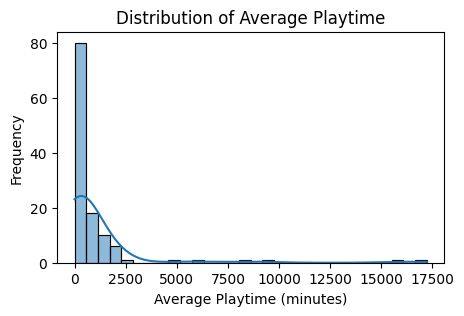

In [ ]:
# Distribution of average playtime
plt.figure(figsize=(5, 3))
sns.histplot(df[~df['month'].isin(['January', 'April'])]['average_forever'], bins=30, kde=True)
plt.title('Distribution of Average Playtime')
plt.xlabel('Average Playtime (minutes)')
plt.ylabel('Frequency')
plt.show()

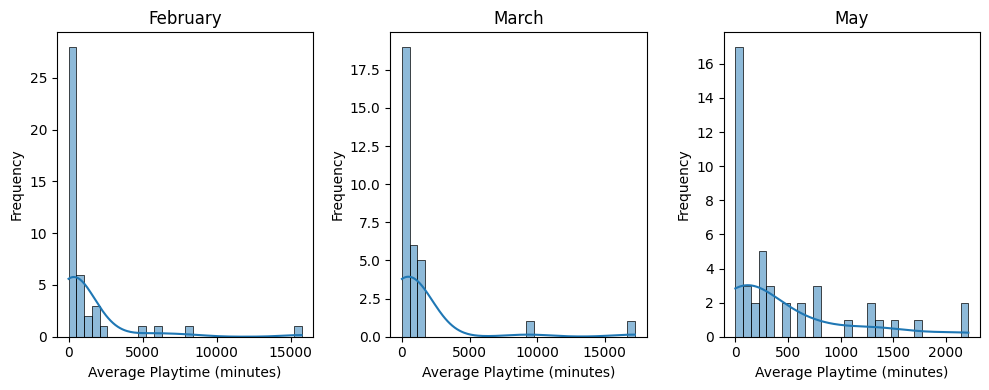

In [ ]:
# Plotting distribution of average playtime by month
plt.figure(figsize=(10, 4))

for i, month in enumerate(['February', 'March', 'May'], start=1):
    plt.subplot(1, 3, i)
    data_month = df[df['month'] == month]['average_forever']
    if not data_month.empty:
        sns.histplot(data_month, bins=30, kde=True)
        plt.title(f'{month}')
        plt.xlabel('Average Playtime (minutes)')
        plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


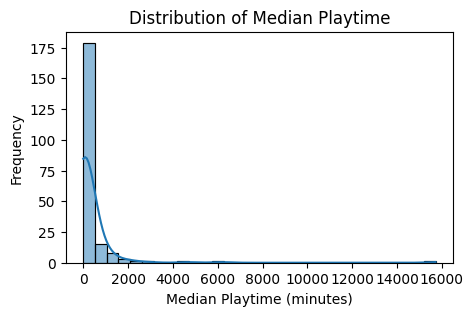

In [ ]:
# Distribution of median playtime
plt.figure(figsize=(5, 3))
sns.histplot(df['median_forever'], bins=30, kde=True)
plt.title('Distribution of Median Playtime')
plt.xlabel('Median Playtime (minutes)')
plt.ylabel('Frequency')
plt.show()

<Figure size 1200x800 with 0 Axes>

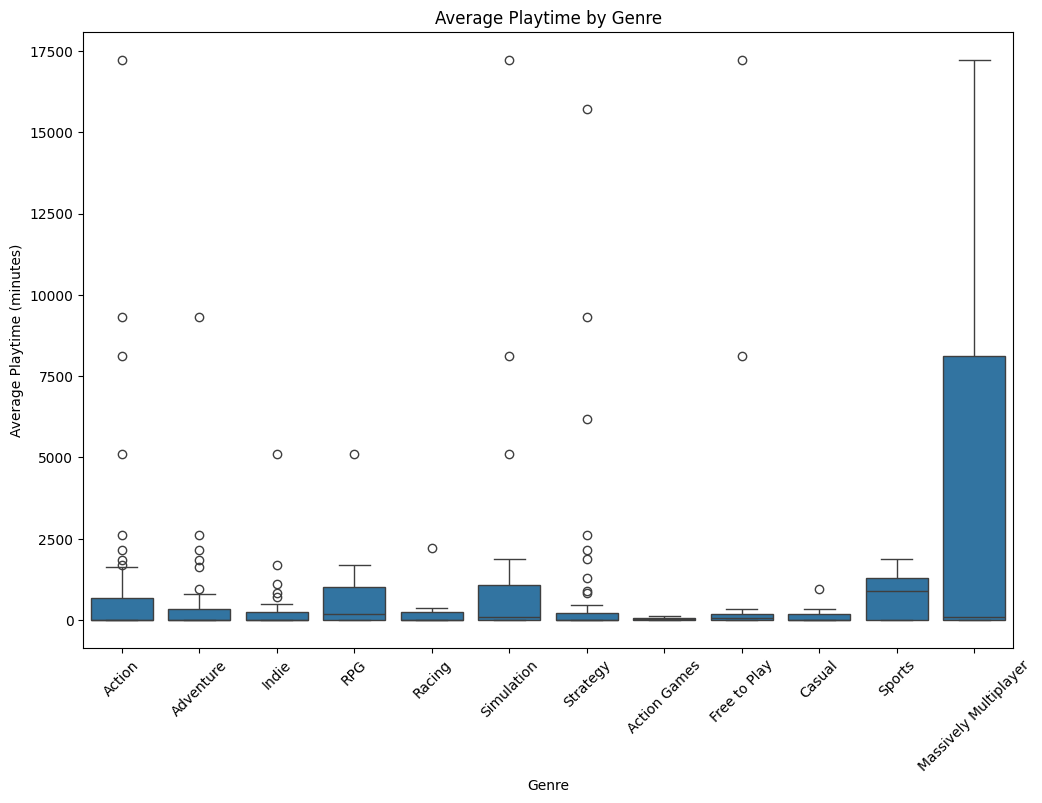

In [ ]:
# Boxplot of average playtime by genre
plt.figure(figsize=(12, 8))


 #Splitting multiple genres into separate rows
genres = df.assign(genre=df['genre'].str.split(', ')).explode('genre').reset_index(drop=True)

# Creating the boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='genre', y='average_forever', data=genres)
plt.title('Average Playtime by Genre')
plt.xticks(rotation=45)
plt.xlabel('Genre')
plt.ylabel('Average Playtime (minutes)')
plt.show()


<Figure size 1200x800 with 0 Axes>

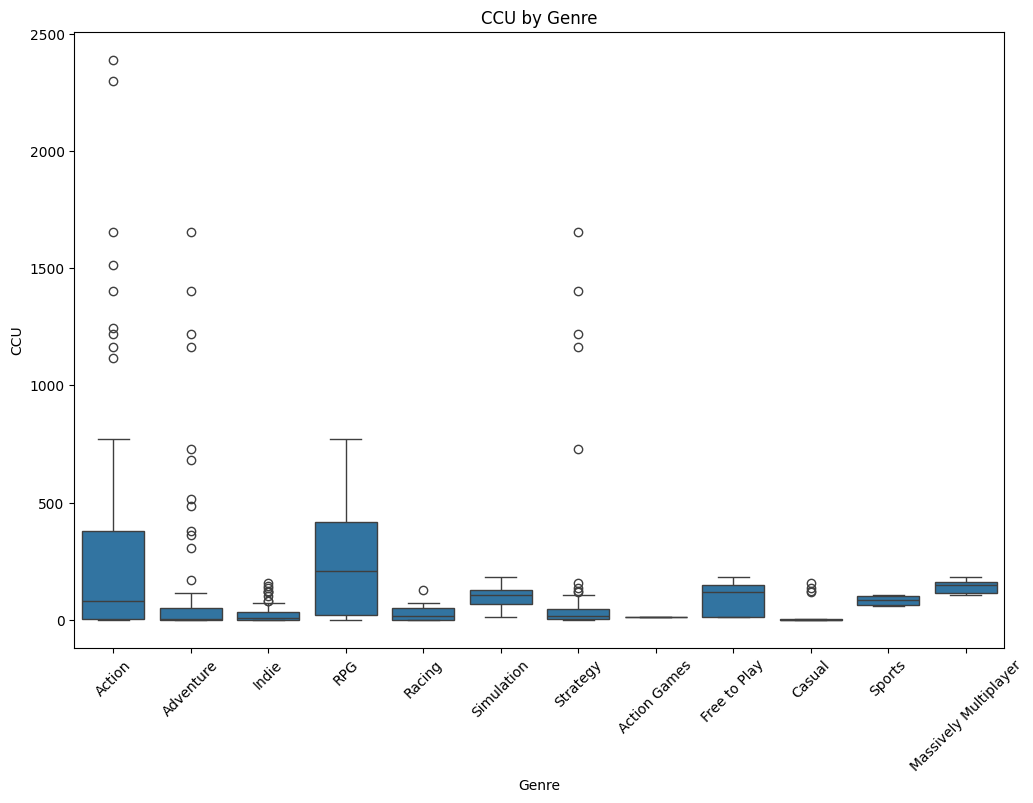

In [ ]:
# Boxplot of average playtime by genre
plt.figure(figsize=(12, 8))


 #Splitting multiple genres into separate rows
genres = df.assign(genre=df['genre'].str.split(', ')).explode('genre').reset_index(drop=True)


# Creating the boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='genre', y='ccu', data=genres)
plt.title('CCU by Genre')
plt.xticks(rotation=45)
plt.xlabel('Genre')
plt.ylabel('CCU')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

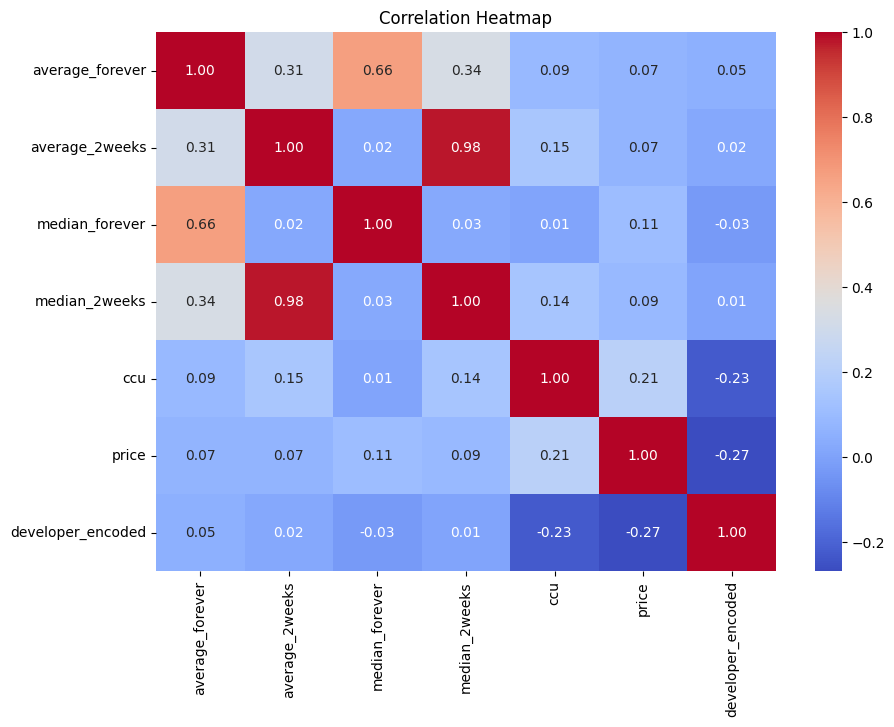

In [ ]:
label_encoder = LabelEncoder()
df_label = df
df_label['developer_encoded'] = label_encoder.fit_transform(df_label['developer'])
numeric_columns = df_label.select_dtypes(include=['float64', 'int64']).columns

# Calculate correlation matrix
correlation_matrix = df[numeric_columns].corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
plt.figure(figsize=(7, 5))

df['languages'] = df['languages'].str.split(', ')
df_lang_exploded = df.explode('languages').reset_index(drop=True)
lang_counts = df_lang_exploded['languages'].value_counts()


plt.figure(figsize=(10, 6))
lang_counts.plot(kind='bar')
plt.title('Distribution of Games by Language')
plt.xlabel('Language')
plt.ylabel('Number of Games')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#Analysis Results



*   Ukrainian games on Steam experience seasonal fluctuations in average Concurrent Users (CCU), with higher numbers observed in January and February (averaging around 142 and 183 CCU respectively) compared to March, April, and May (averaging around 121, 138, and 111 CCU respectively)
*   February stands out with the highest average playtime, averaging about 27-28 minutes per session
*   Metro Exodus and Cossacks 3 emerge as the most played Ukrainian games based on CCU, with significant user numbers exceeding 1000. These games notably differ from others, where CCU typically remains under 500, often below 200.
*   The majority of users engage in gaming sessions lasting around 80 minutes
*   Action and RPG genres dominate in terms of CCU, suggesting a strong player preference for these genres. Interestingly, Multiplayer games exhibit the longest playtime for the period from 2009
*   Strategy and Adventure genres show numerous high data outliers, hinting at the presence of highly successful or popular games within these categories
*   The top five languages by frequency—English, Russian, French, German, and Spanish—highlight the global appeal of Ukrainian games on Steam





In [ ]:
df.to_csv('steam_games.csv')
files.download("steam_games.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>